C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


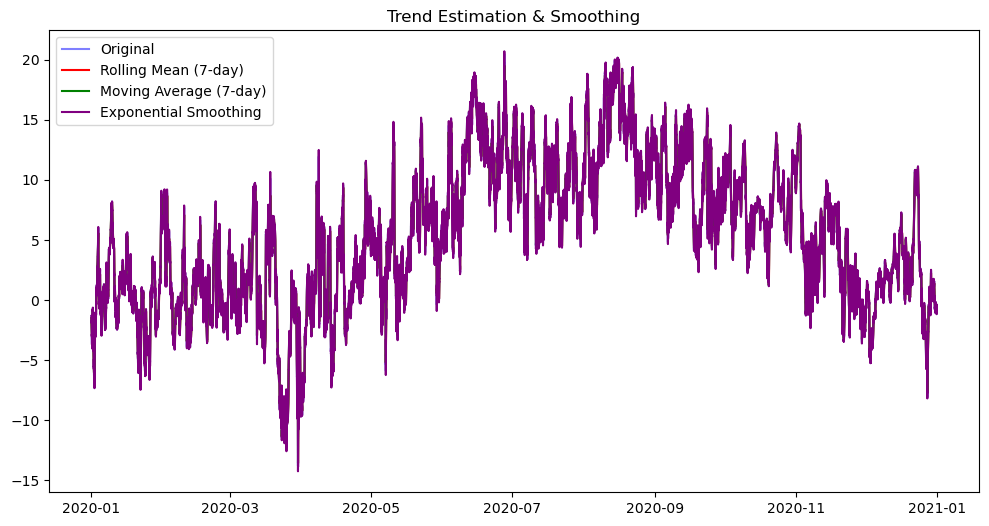

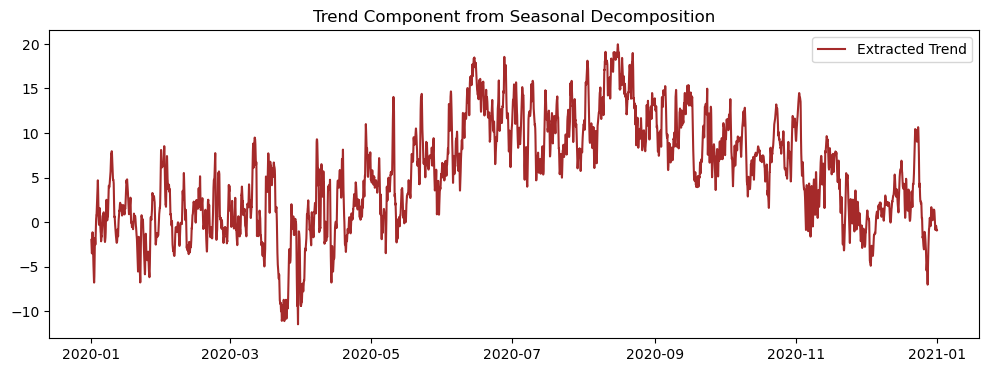

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
df = pd.read_csv(r"C:\Users\harsh\Downloads\cleaned_weather.csv", parse_dates=['date'], index_col='date')

# Selecting the time series column (e.g., Temperature)
time_series = df['Tdew']

# 1. Aggregation - Rolling Mean
rolling_mean = time_series.rolling(window=7).mean()

# 2. Smoothing - Moving Average
moving_avg = time_series.rolling(window=7, center=True).mean()

# 3. Exponential Smoothing
exp_smooth = ExponentialSmoothing(time_series, trend='add', seasonal=None, damped_trend=False).fit().fittedvalues

# 4. Seasonal Decomposition (Trend Extraction)
decomposition = seasonal_decompose(time_series, model='additive', period=30)
trend = decomposition.trend

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original', color='blue', alpha=0.5)
plt.plot(rolling_mean, label='Rolling Mean (7-day)', color='red')
plt.plot(moving_avg, label='Moving Average (7-day)', color='green')
plt.plot(exp_smooth, label='Exponential Smoothing', color='purple')
plt.title('Trend Estimation & Smoothing')
plt.legend()
plt.show()

# Plot decomposed trend
plt.figure(figsize=(12, 4))
plt.plot(trend, label='Extracted Trend', color='brown')
plt.title('Trend Component from Seasonal Decomposition')
plt.legend()
plt.show()
